In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diagnostic.csv')
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [3]:
df.shape

(299, 13)

In [4]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [5]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
x = df.drop('DEATH_EVENT', axis=1)

In [7]:
y = df['DEATH_EVENT']

In [8]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:xlabel='diabetes', ylabel='count'>

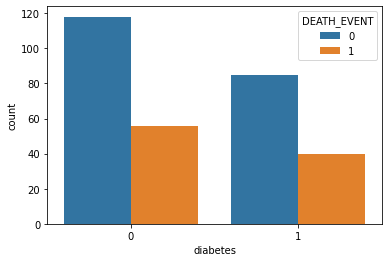

In [9]:
sb.countplot(x='diabetes',data=df, hue='DEATH_EVENT')

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

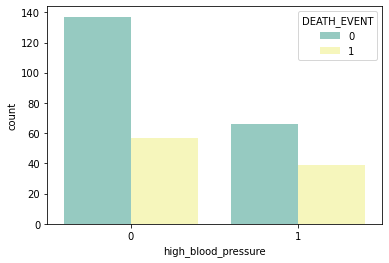

In [10]:
sb.countplot(x='high_blood_pressure',data=df,hue='DEATH_EVENT',palette="Set3")

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
d_tree = DecisionTreeClassifier()

In [15]:
d_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [16]:
x_test.shape

(90, 12)

In [17]:
x_train.shape

(209, 12)

In [18]:
pred = d_tree.predict(x_test)

In [19]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [20]:
y_test

12     1
220    1
36     1
0      1
32     1
      ..
104    0
139    0
51     1
262    1
287    0
Name: DEATH_EVENT, Length: 90, dtype: int64

In [21]:
d_tree.score(x_test, y_test)

0.7555555555555555

In [22]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_roc_curve

In [23]:
cm = confusion_matrix(y_test, pred)
cm

array([[48, 12],
       [10, 20]], dtype=int64)

In [24]:
# cross check for decision tree score by Accuracy law
accuracy = (48 + 19) / (48 + 10 + 13 + 19)
accuracy

0.7444444444444445

In [25]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        60
           1       0.62      0.67      0.65        30

    accuracy                           0.76        90
   macro avg       0.73      0.73      0.73        90
weighted avg       0.76      0.76      0.76        90



In [26]:
#check accuracy score
accuracy_score(y_test, pred)

0.7555555555555555

# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
ran = RandomForestClassifier()

In [29]:
ran.fit(x_train, y_train)

RandomForestClassifier()

In [30]:
ran.score(x_test, y_test)

0.8555555555555555

# Randomized Search Cv

In [31]:
from sklearn.model_selection import RandomizedSearchCV

In [32]:
rnf = RandomForestClassifier()

In [33]:
n_estimators = [int(x) for x in np.linspace(start = 150, stop = 500, num = 15)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [2, 3, 4, 5, 6, 7, 8]
min_samples_split = [2, 5, 10, 12, 15]
min_samples_leaf = [2, 4, 6, 8, 10, 15]

#Create ids
grids = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'criterion':['entropy','gini']
}

print(grids)

{'n_estimators': [150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [2, 3, 4, 5, 6, 7, 8], 'min_samples_split': [2, 5, 10, 12, 15], 'min_samples_leaf': [2, 4, 6, 8, 10, 15], 'criterion': ['entropy', 'gini']}


In [34]:
rmcv = RandomizedSearchCV(estimator = rnf, param_distributions= grids, n_iter=200, cv=3)

In [35]:
rmcv.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=200,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 4, 6, 8, 10,
                                                             15],
                                        'min_samples_split': [2, 5, 10, 12, 15],
                                        'n_estimators': [150, 175, 200, 225,
                                                         250, 275, 300, 325,
                                                         350, 375, 400, 425,
                                                         450, 475, 500]})

In [36]:
rmcv.best_params_

{'n_estimators': 375,
 'min_samples_split': 12,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 8,
 'criterion': 'entropy'}

In [37]:
best_parameters = rmcv.best_estimator_

In [38]:
best_parameters

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=12,
                       n_estimators=375)

In [39]:
rmcv.cv_results_

{'mean_fit_time': array([0.67923729, 0.8614711 , 0.69338822, 0.64189537, 0.34251499,
        0.61004639, 0.4695158 , 0.4017272 , 0.84713634, 0.66806213,
        0.75334708, 0.71724057, 1.03638832, 1.08460132, 0.75053652,
        0.77100166, 1.93799766, 1.56166752, 1.76803748, 1.65849217,
        0.64366746, 0.46133216, 0.26299993, 0.99866573, 0.78400421,
        0.54800137, 1.02766538, 0.3670009 , 0.41733011, 0.4483308 ,
        0.75499717, 0.45233313, 0.49899991, 1.12866632, 0.61466257,
        1.50299899, 0.77333673, 1.37733221, 0.78802705, 0.36801044,
        0.2643253 , 0.29800638, 0.28167295, 0.2450188 , 0.24466451,
        0.33234135, 0.62798127, 0.32599998, 0.65533233, 0.67097712,
        0.40932171, 0.64032491, 0.74967686, 0.72300959, 0.55199114,
        0.35600519, 0.40166132, 0.45197503, 0.41667477, 0.41266759,
        0.79199934, 1.10950828, 0.49600331, 0.64484859, 0.83240159,
        0.70934598, 0.81377951, 0.33199811, 0.41465759, 0.76800402,
        0.28601623, 0.84365074,

In [40]:
results = pd.DataFrame(rmcv.cv_results_)

In [41]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.679237,0.075081,0.064328,0.021741,300,5,8,sqrt,6,gini,"{'n_estimators': 300, 'min_samples_split': 5, ...",0.842857,0.842857,0.840580,0.842098,0.001074,96
1,0.861471,0.014522,0.062942,0.013301,500,5,4,log2,5,entropy,"{'n_estimators': 500, 'min_samples_split': 5, ...",0.842857,0.800000,0.840580,0.827812,0.019688,137
2,0.693388,0.018961,0.057291,0.007365,450,10,10,auto,5,gini,"{'n_estimators': 450, 'min_samples_split': 10,...",0.857143,0.828571,0.855072,0.846929,0.013008,59
3,0.641895,0.034277,0.049582,0.003830,375,10,8,sqrt,2,entropy,"{'n_estimators': 375, 'min_samples_split': 10,...",0.814286,0.828571,0.782609,0.808489,0.019207,176
4,0.342515,0.037587,0.018752,0.004420,200,15,2,log2,3,gini,"{'n_estimators': 200, 'min_samples_split': 15,...",0.842857,0.842857,0.840580,0.842098,0.001074,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.386991,0.011439,0.028342,0.001246,225,5,2,sqrt,6,entropy,"{'n_estimators': 225, 'min_samples_split': 5, ...",0.842857,0.785714,0.884058,0.837543,0.040324,107
196,0.293331,0.016216,0.026333,0.004987,175,10,15,auto,8,entropy,"{'n_estimators': 175, 'min_samples_split': 10,...",0.785714,0.814286,0.797101,0.799034,0.011744,185
197,0.778653,0.005897,0.059677,0.002858,475,2,10,auto,7,gini,"{'n_estimators': 475, 'min_samples_split': 2, ...",0.842857,0.828571,0.869565,0.846998,0.016990,53
198,0.496981,0.015309,0.040007,0.002839,300,15,2,sqrt,7,gini,"{'n_estimators': 300, 'min_samples_split': 15,...",0.857143,0.828571,0.884058,0.856591,0.022656,14


In [42]:
best_parameters.predict(x_test)

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0], dtype=int64)

In [43]:
best_parameters.score(x_test, y_test)

0.8555555555555555